# Actividad 2

##### Los datos que se van a utilizar procederán del dataset mtcars, tenéis una explicación del mismo y de lo que contiene en el siguiente enlace:

https://rpubs.com/neros/61800



# 1. Sobre la columna qsec realizar un análisis incluyendo el cálculo de medidas de tendencia central, de dispersión y de forma, apoyando los resultados sobre los gráficos necesarios y comentando las deducciones realizadas.

In [110]:
library(dplyr)
library(ggplot2)
library(e1071)
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [111]:
summary(mtcars$qsec)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.50   16.89   17.71   17.85   18.90   22.90 

In [112]:
dfqsec<-mtcars$qsec

In [113]:
media<-mean(dfqsec)
cat("La media es:",media)

La media es: 17.84875

In [114]:
mediana<-median(dfqsec)
cat("La mediana es:",mediana)

La mediana es: 17.71

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


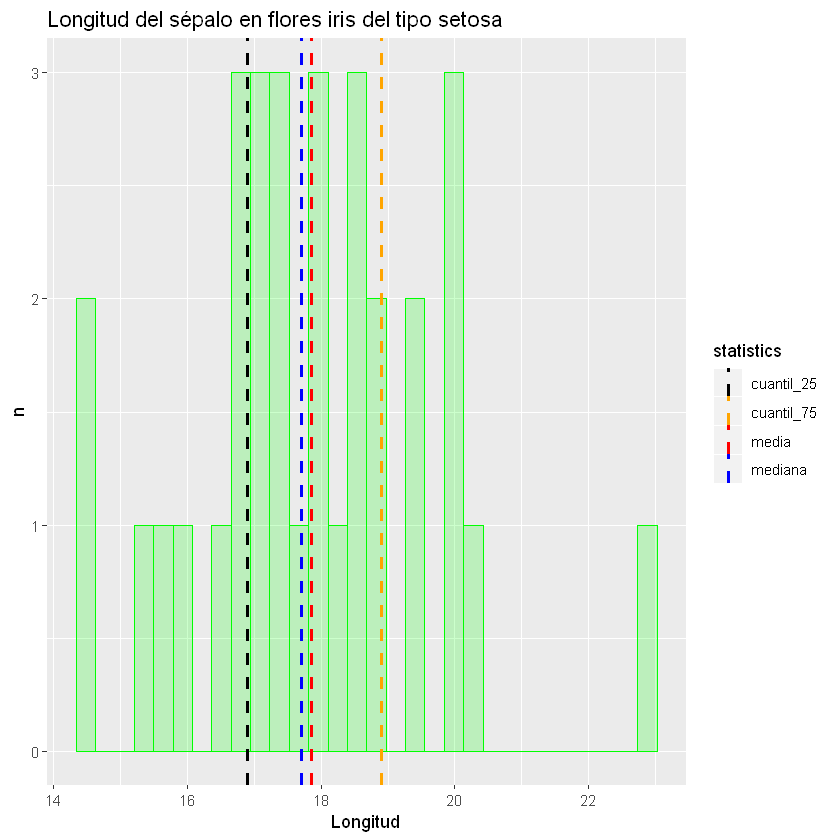

In [115]:

ggplot(aes(x = dfqsec), data = mtcars) + 
  geom_histogram(color = 'green', fill = 'green', alpha = 0.2) +
  labs(title="Longitud del sépalo en flores iris del tipo setosa") +
  geom_vline(aes(xintercept=median(dfqsec),
                 color="mediana"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept = mean(dfqsec),
                 color="media"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept = quantile(dfqsec, 0.25),
                 color="cuantil_25"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept = quantile(dfqsec, 0.75),
                 color="cuantil_75"), linetype="dashed",
             size=1) +
  scale_color_manual(name = "statistics", values = c(mediana = "blue", media = "red", cuantil_25 = "black", 
                                                     cuantil_75 = "orange"))+
  xlab("Longitud") + ylab("n")

Se puede observar que la mayoria de los valores se encuentran cercanos a la media, entre el cuartil 0,25 y el 0,75.

In [116]:
moda <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
m<-moda(dfqsec)
cat("La Moda es :", m)

La Moda es : 17.02

Se observa que la mediana, la media y la moda son valores cercanos. 17.8, 17,71 y 17.02.



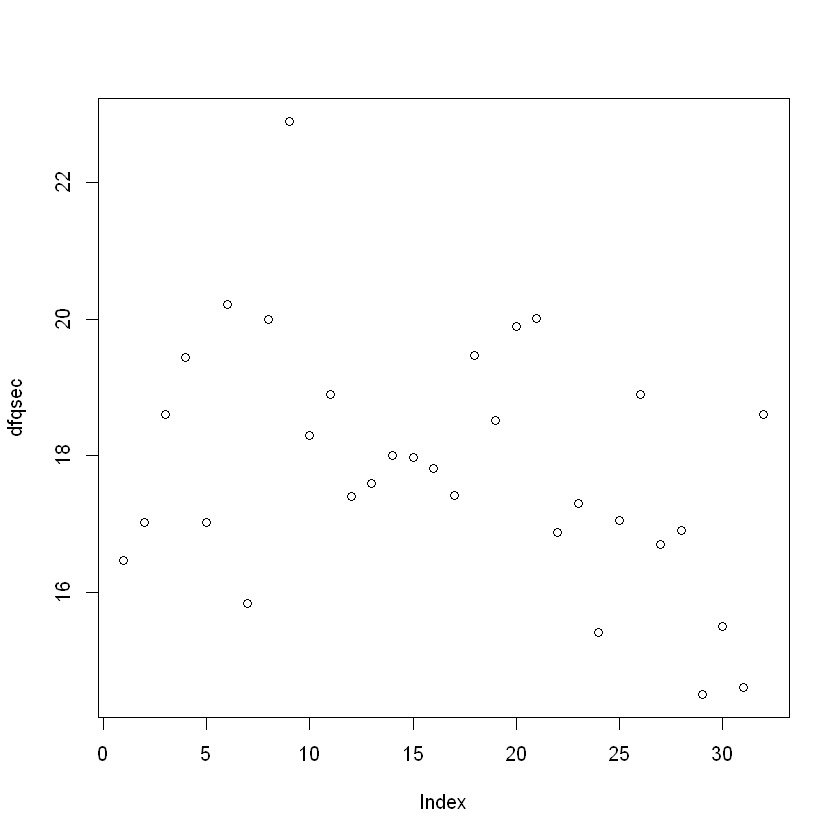

In [117]:
plot(dfqsec)

En el anterior grafico de dispersion vemos que la mayoria de los valores se encuentran entre 16 y 20, es decir la mayoria de los vehiculos  alcanzan 1/4 de milla entre 16 y 20 segundos.

In [118]:
minimo<-min(dfqsec)
maximo<-max(dfqsec)
cat("El vehiculo que alcanza el 1/4 de milla mas rapido tiene un tiempo de ", minimo,"Segundos")


El vehiculo que alcanza el 1/4 de milla mas rapido tiene un tiempo de  14.5 Segundos

In [119]:
cat("El vehiculo que alcanza el 1/4 de milla mas tarde tiene un tiempo de ", maximo,"Segundos")

El vehiculo que alcanza el 1/4 de milla mas tarde tiene un tiempo de  22.9 Segundos

## Medidas de dispersión

In [120]:
#Varianza
varianza<-var(dfqsec) 
#Desviacion tipica
Deviacion_tipica<-sd(dfqsec)

In [121]:
cat("La Varianza es igual a ", varianza)

La Varianza es igual a  3.193166

In [122]:
cat("La desviación tipíca a es igual a ", Deviacion_tipica)

La desviación tipíca a es igual a  1.786943

Según estos resultados, podemos afirmar que los varlores se encuentran concentrados cercanos a la media.

# Medidas de forma

### Asimetria


In [123]:
skewness(dfqsec)

[1] 0.3690453

Segú este resultado, hablamos de una forma simetrica positiva, es decir la cola mas larga a la derecha. veamos el histograma para comprobar esto

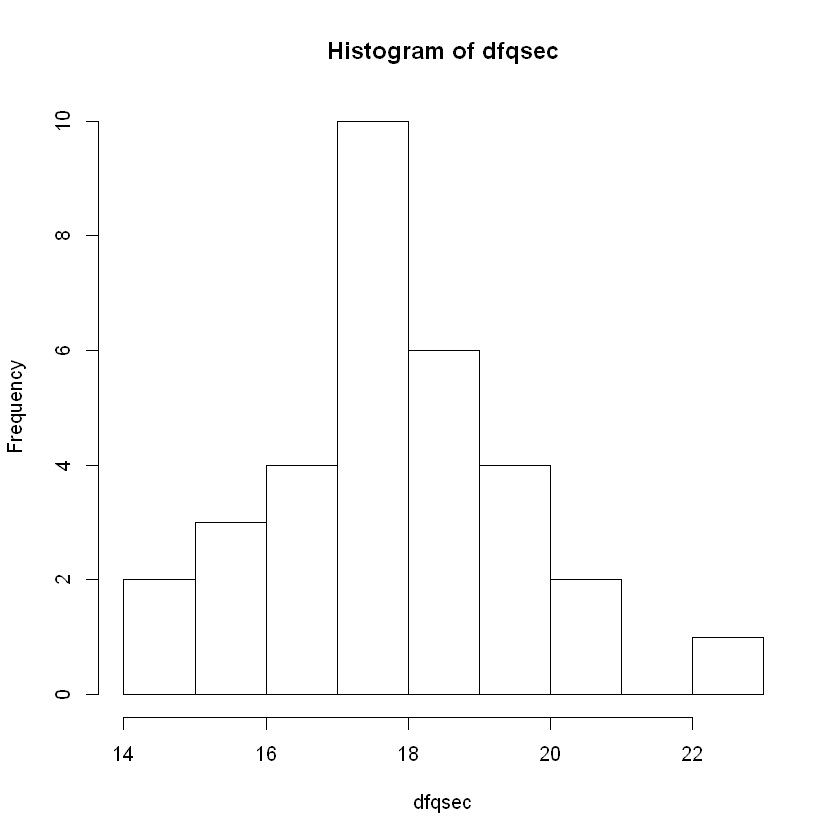

In [124]:
hist(dfqsec)

Efectivamente, vemos que hay mas valores a la derecha, con un dato cercano en el intervalo 22

# Kurtosis

In [125]:

kurtosis(dfqsec)

[1] 0.3351142

Según la curtosis, obtenemos un valor positivo, indicandonos el apuntamiento hacia la zona de la media, tal como se ve en el histograma

# 2. Implementar un modelo de regresión utilizando las variables disp y wt, donde disp será la variable respuesta y wt la variable explicativa. Hay que comentar los resultados obtenidos y apoyarlos sobre gráficos.

In [126]:
head(mtcars)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


disp	Displacement (cu.in.)	Displacement measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.


wt	Weight (lb/1000)	The overall weight of the vehicle per 1000lbs (half US ton)

In [127]:
datos_regre <- data.frame(displacement=mtcars$disp, weight= mtcars$wt)
head(datos_regre)

displacement,weight
160,2.620
160,2.875
108,2.320
258,3.215
360,3.440
225,3.460


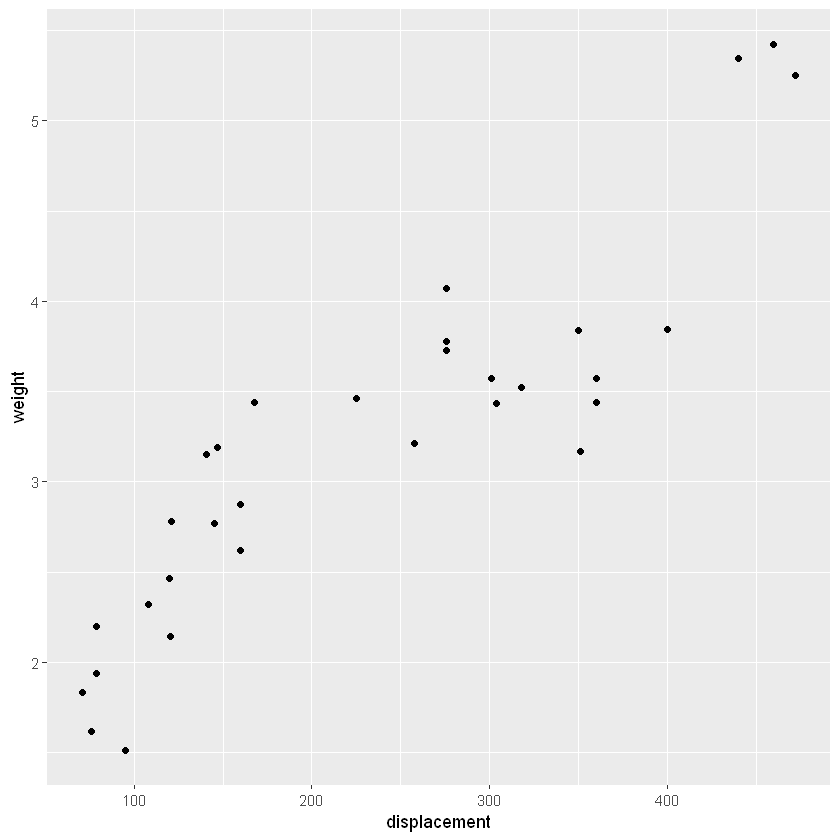

In [128]:
library(ggplot2)
plot <- ggplot(datos_regre, aes(x=displacement, y=weight)) + geom_point()
plot

se puede observar que existe cierto grado de correlacion entre "Desplazamiento" o cilindraje y el peso del vehiculo.

In [129]:
regresion <- lm(displacement ~ weight, data = datos_regre)
summary(regresion)


Call:
lm(formula = displacement ~ weight, data = datos_regre)

Residuals:
   Min     1Q Median     3Q    Max 
-88.18 -33.62 -10.05  35.15 125.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -131.15      35.72  -3.672 0.000933 ***
weight        112.48      10.64  10.576 1.22e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 57.94 on 30 degrees of freedom
Multiple R-squared:  0.7885,	Adjusted R-squared:  0.7815 
F-statistic: 111.8 on 1 and 30 DF,  p-value: 1.222e-11


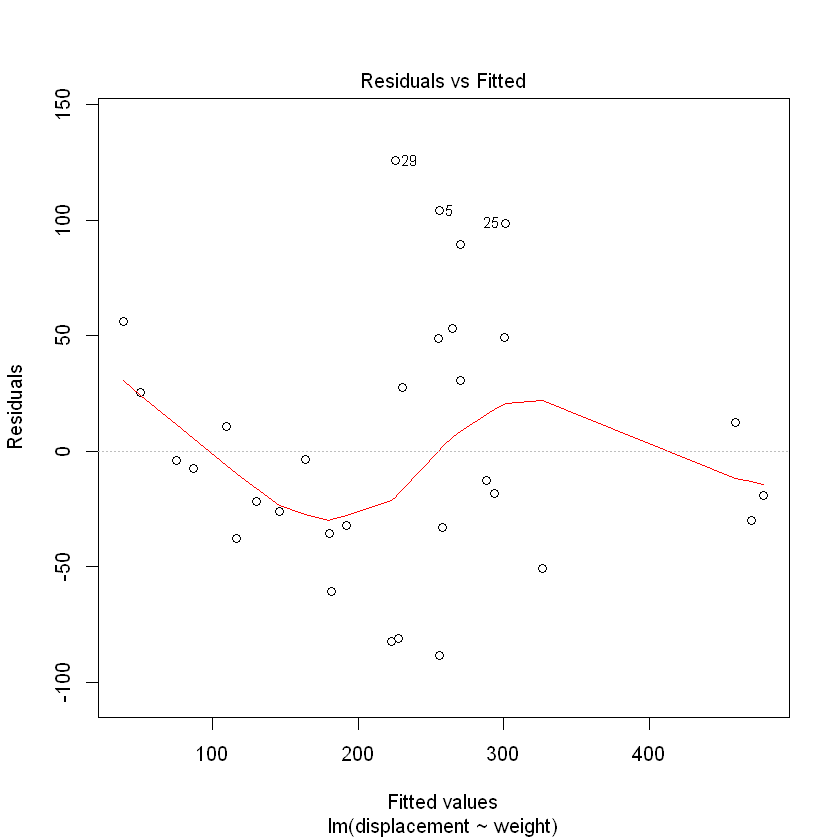

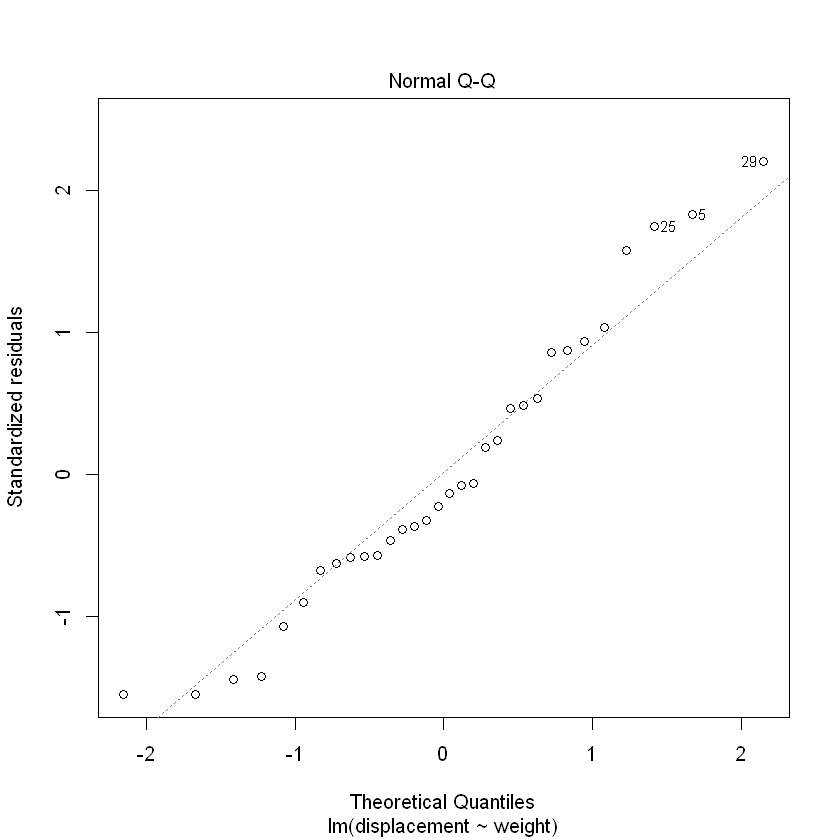

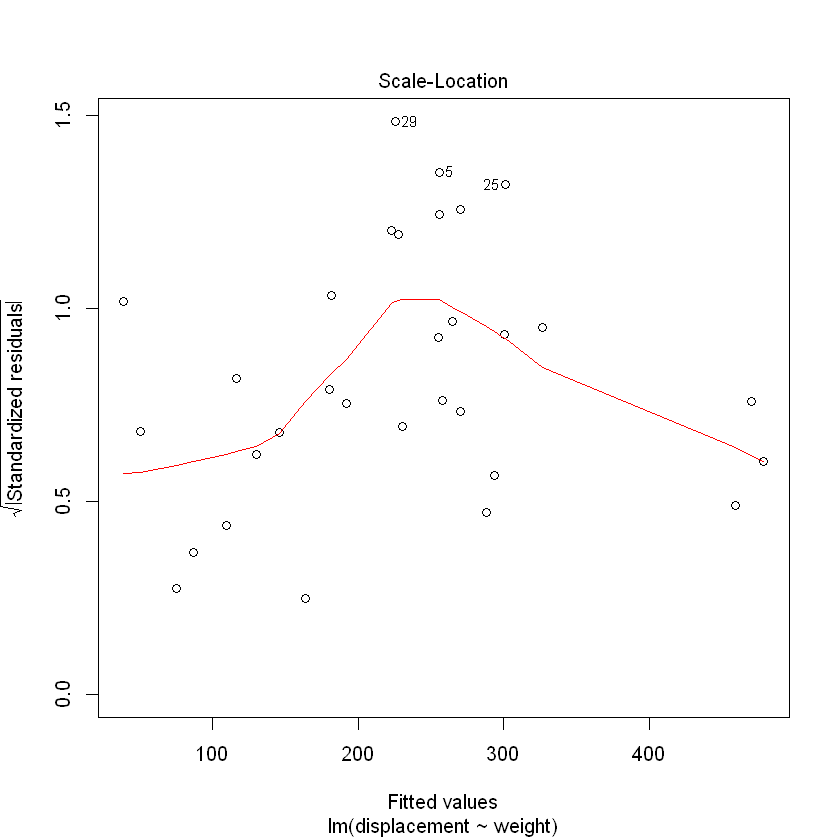

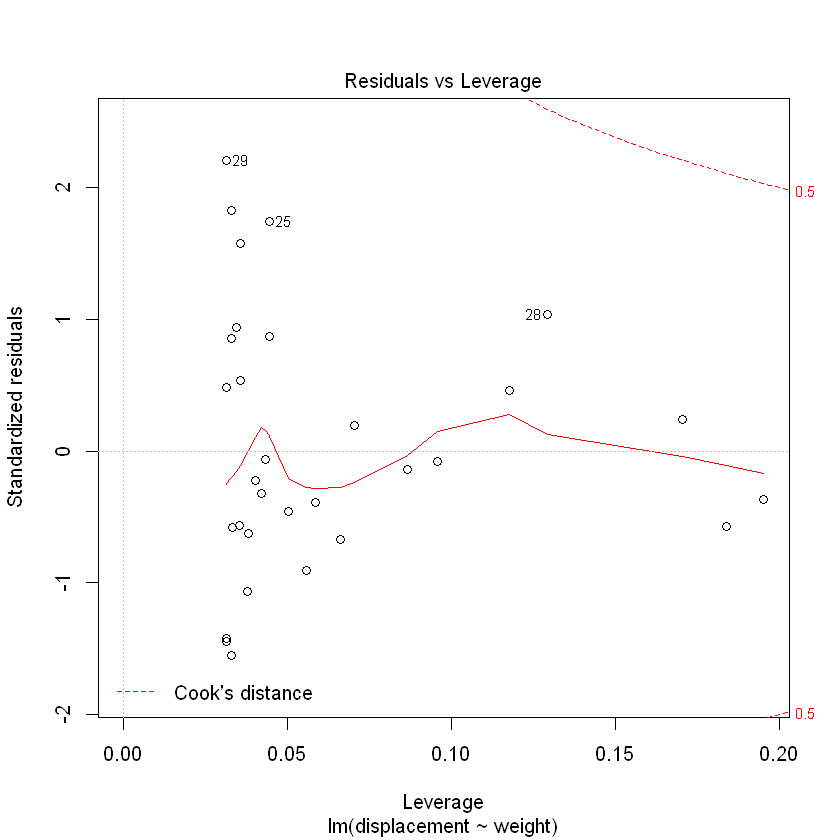

In [130]:
plot(regresion)

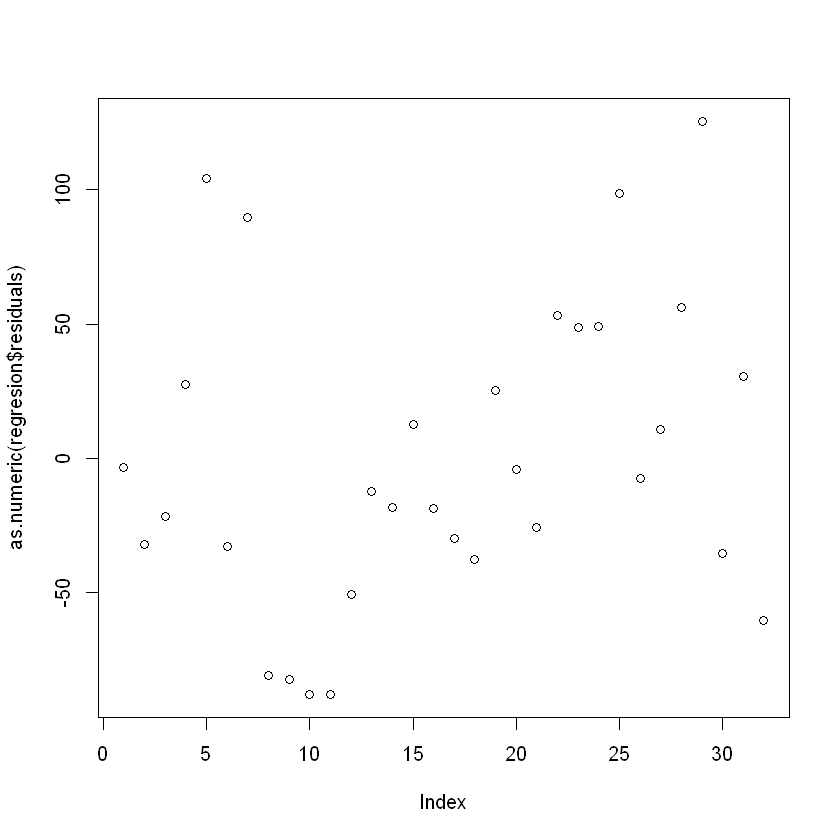

In [131]:
plot(as.numeric(regresion$residuals))

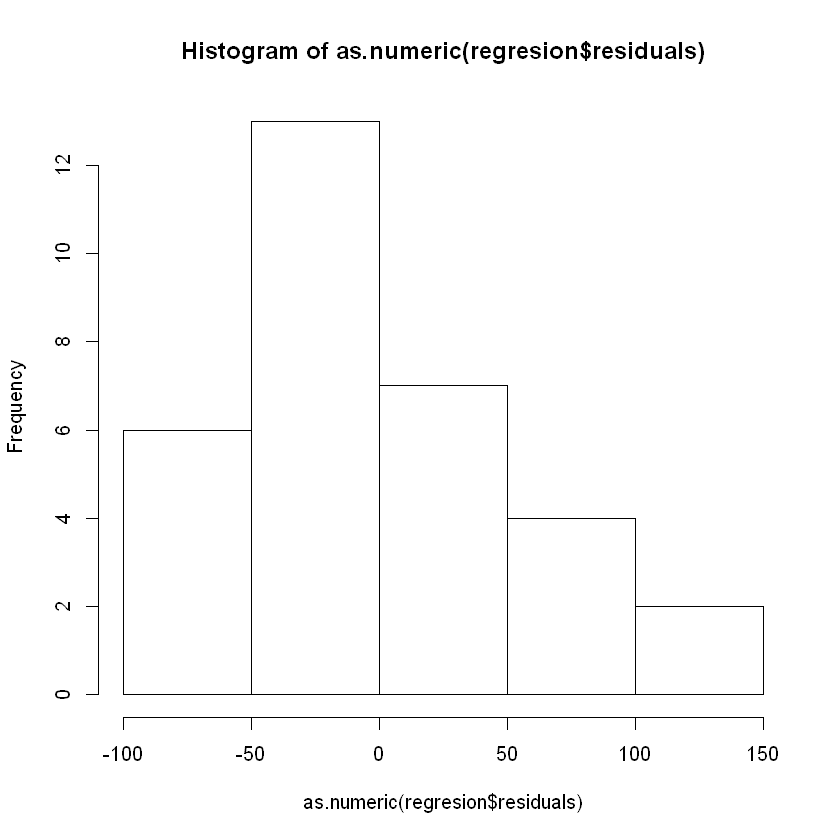

In [132]:
hist(as.numeric(regresion$residuals))

In [133]:
shapiro.test(regresion$residuals)


	Shapiro-Wilk normality test

data:  regresion$residuals
W = 0.96071, p-value = 0.2872


p-value es > 0.05, es probable que la distribucion sea normal

#### Homocedasticidad

In [134]:

#install.packages("lmtest",repos = "http://cran.us.r-project.org")
lmtest::bptest(regresion)


	studentized Breusch-Pagan test

data:  regresion
BP = 0.26991, df = 1, p-value = 0.6034


p-value>0.05, por lo tanto se cumple con la condicion de homocedasticidad

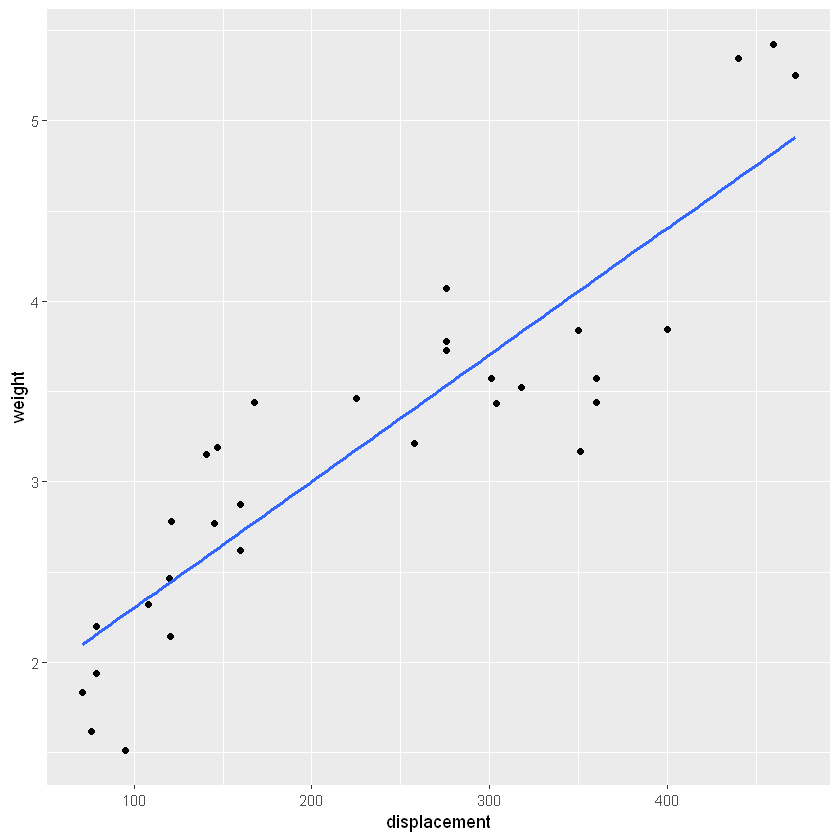

In [135]:
plot + geom_smooth(method = "lm", se = FALSE)

In [136]:
Vemos que hay relacion directa entre cilindraje y peso del vehiculo.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: Vemos que
          ^


# 3. Implementar un modelo de regresión utilizando las variables disp, wt y hp, donde disp será la variable respuesta y wt y hp las variables explicativas. Hay que comentar los resultados obtenidos y apoyarlos sobre gráficos.

In [137]:
head(mtcars)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [138]:
datos_regreM <- data.frame(displacement=mtcars$disp, weight= mtcars$wt, hp=mtcars$hp)
head(datos_regreM)

displacement,weight,hp
160,2.620,110
160,2.875,110
108,2.320,93
258,3.215,110
360,3.440,175
225,3.460,105


	hp	Gross horsepower	Gross horsepower measures the theoretical output of an engine’s power output; notably, gross rating is of the engine in an isolated environment outside any specific vehicle. When installed in a car, exhaust systems, carburetor, alternator, power systems, etc all influence the power that actually gets to the drive train. Moreover, according to online sources, in the early 1970s, regulatory changes influenced how gross horsepower was measured. As this dataset is from the early-mid 1970s, it’s unclear if hp metrics may be used as reliable comparators of engine power across models as it’s uncertain how manufacturers are reporting

In [139]:
regresionM <- lm(displacement ~ weight + hp , data = datos_regreM )

In [140]:
summary(regresionM)


Call:
lm(formula = displacement ~ weight + hp, data = datos_regreM)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.565 -23.802   2.111  35.731  99.107 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -129.9506    29.1890  -4.452 0.000116 ***
weight        82.1125    11.5518   7.108 8.04e-08 ***
hp             0.6578     0.1649   3.990 0.000411 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.35 on 29 degrees of freedom
Multiple R-squared:  0.8635,	Adjusted R-squared:  0.8541 
F-statistic: 91.71 on 2 and 29 DF,  p-value: 2.889e-13


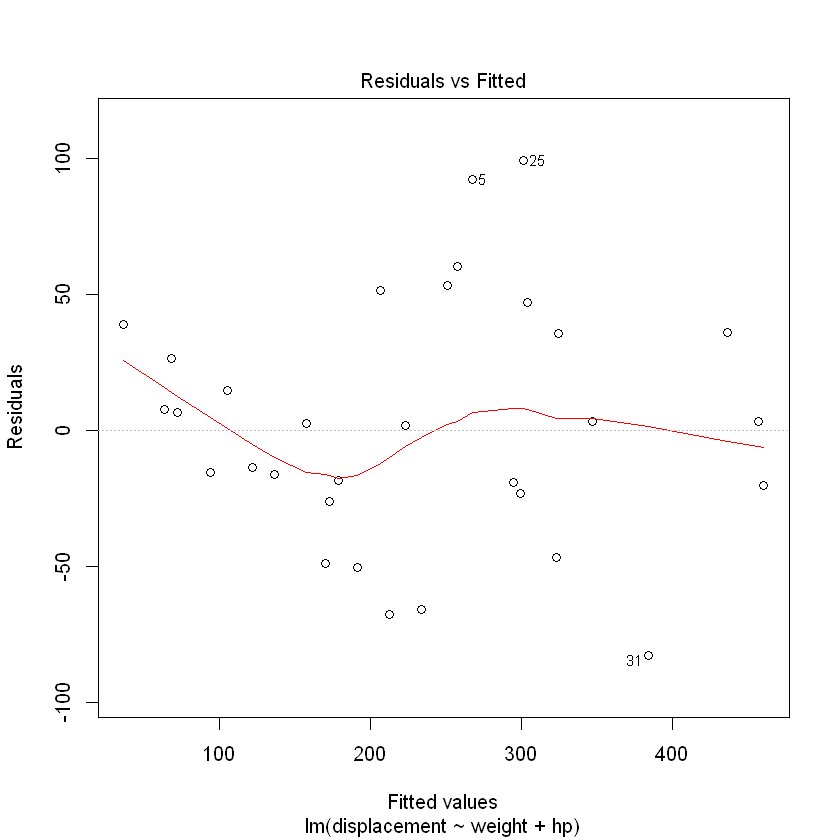

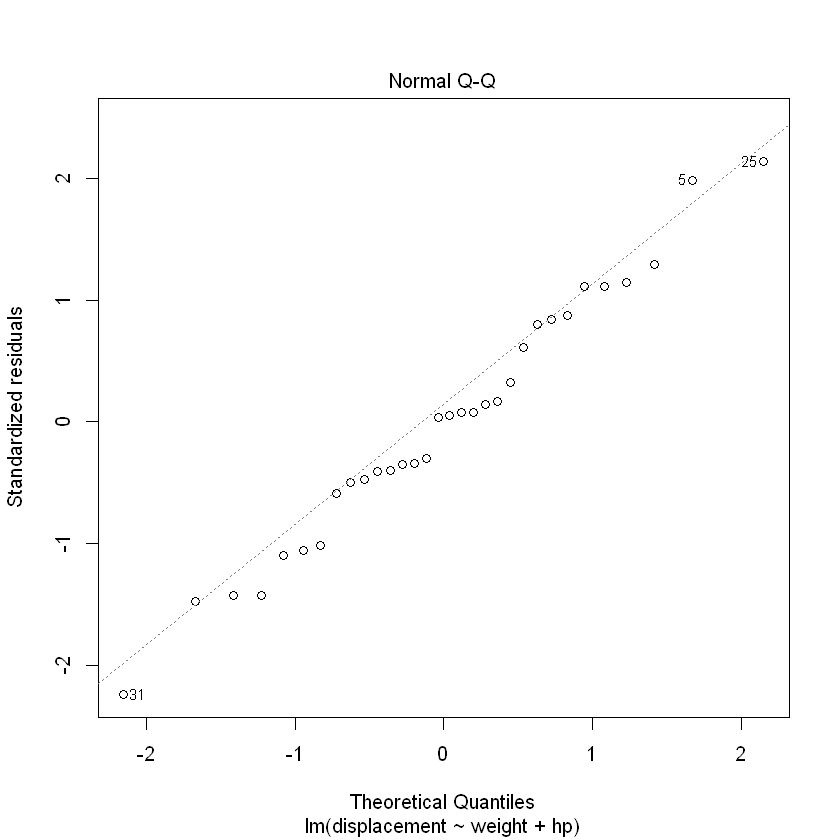

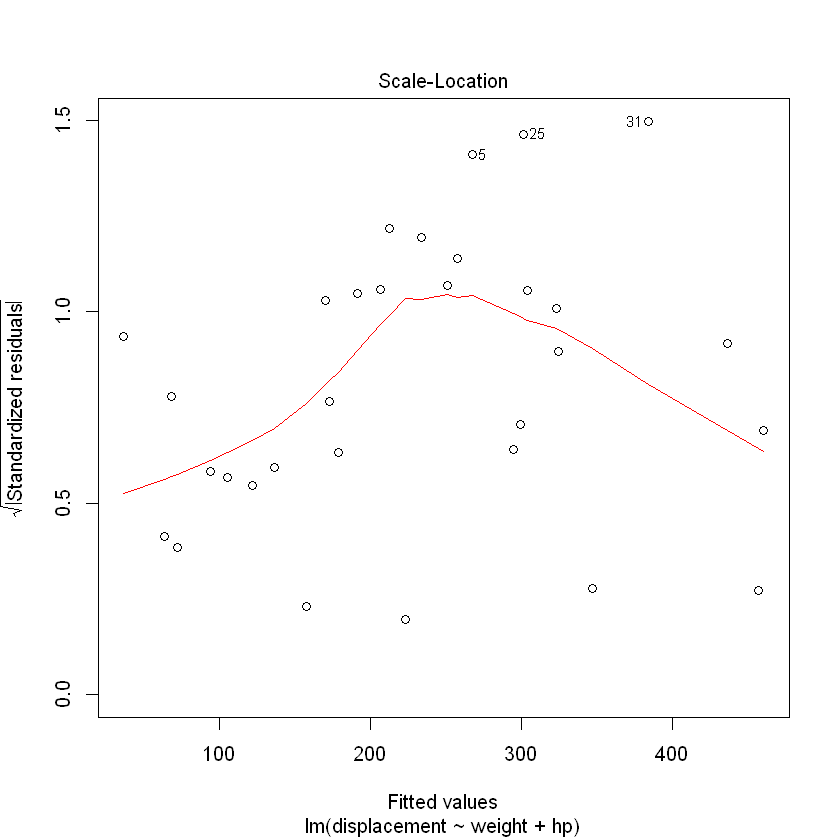

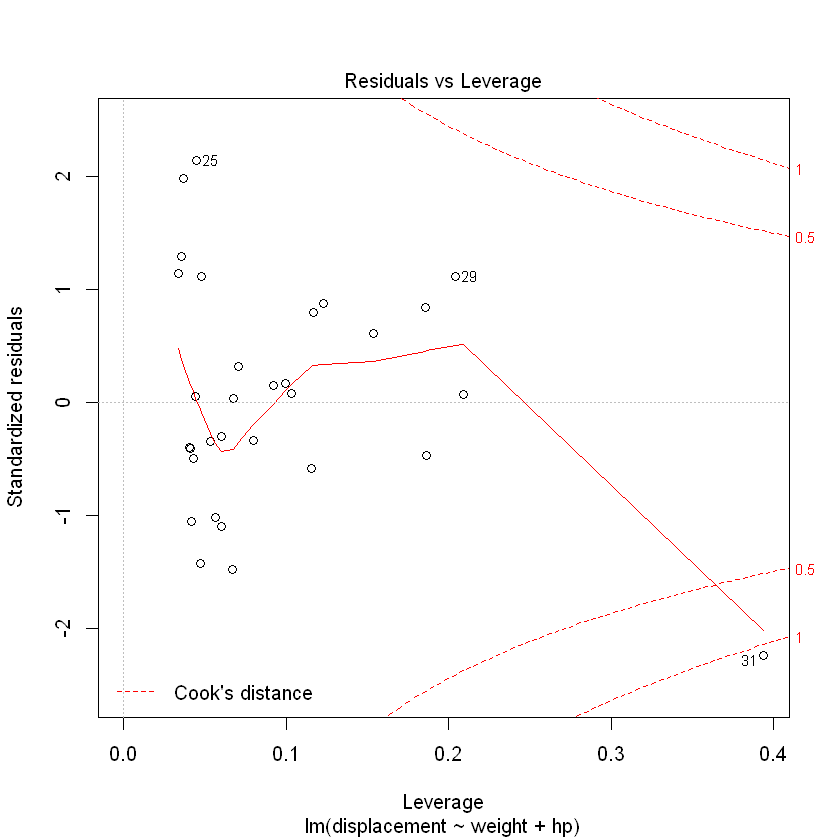

In [141]:
plot(regresionM)

In [142]:
shapiro.test(regresionM$residuals)


	Shapiro-Wilk normality test

data:  regresionM$residuals
W = 0.97544, p-value = 0.6606


vemos que el P-value> 0.05, por lo tanto es probable una distribucion normal


In [143]:
lmtest::bptest(regresionM)


	studentized Breusch-Pagan test

data:  regresionM
BP = 3.4279, df = 2, p-value = 0.1801


p-value>0.05, por lo tanto se cumple con la condicion de homocedasticidad

# 4. Calcular matricialmente los coeficientes del ejercicio 3. También calcular la matriz hat y analizar el apalancamiento y calcular los residuos. Todo esto utilizando la matriz con las variables explicativas, el vector de la variable respuesta y el vector de residuos obtenido del objeto lm del ejercicio 3.

In [170]:
regresionM
summary(regresionM)


Call:
lm(formula = displacement ~ weight + hp, data = datos_regreM)

Coefficients:
(Intercept)       weight           hp  
  -129.9506      82.1125       0.6578  



Call:
lm(formula = displacement ~ weight + hp, data = datos_regreM)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.565 -23.802   2.111  35.731  99.107 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -129.9506    29.1890  -4.452 0.000116 ***
weight        82.1125    11.5518   7.108 8.04e-08 ***
hp             0.6578     0.1649   3.990 0.000411 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.35 on 29 degrees of freedom
Multiple R-squared:  0.8635,	Adjusted R-squared:  0.8541 
F-statistic: 91.71 on 2 and 29 DF,  p-value: 2.889e-13


In [158]:
X <- with(mtcars, as.matrix(cbind(1,wt,hp)))
Y <- as.matrix(mtcars$disp)


In [164]:
H <- X %*% solve(t(X) %*% X) %*% t(X)


In [167]:
diag(H)
4/32
sum(diag(H)>4/32)

[1] 0.04427691 0.04048669 0.06020097 0.04747494 0.03686288 0.06715104
 [7] 0.11701542 0.11565615 0.06001631 0.04691083 0.04691083 0.05619559
[13] 0.04123610 0.04257292 0.18577112 0.20897838 0.18648721 0.07990991
[19] 0.12295814 0.09950335 0.05303126 0.03571654 0.03339813 0.10298538
[25] 0.04453321 0.09225188 0.07078181 0.15364135 0.20442386 0.06704651
[31] 0.39420816 0.04140623

[1] 0.125

[1] 6

En este caso tenemos 6 puntos que estan tirando la recta hacia ellos, deformando la trayectoria de la recta.

In [176]:
residuos <- regresionM$residuals
var <- t(residuos) %*% residuos * 1/(32-3) # esto se puede comparar con el summary()
sqrt(var)
as.numeric(residuos/(sqrt(var) * sqrt(1-diag(H))))


47.34774


Warning message in sqrt(var) * sqrt(1 - diag(H)):
"Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
"

[1]  0.05301824 -0.39855222 -0.29910364  1.11657593  1.98771015  0.03867795
 [7]  0.80104660 -0.58559602 -1.09787814 -1.42415683 -1.42415683 -1.01868025
[13] -0.40851243 -0.49741660  0.84271040  0.07452002 -0.47400523 -0.33939093
[19]  0.87573932  0.16948259 -0.35087507  1.29562605  1.14325753  0.07736445
[25]  2.14139923  0.14732205  0.32135211  0.60789309  1.11256838 -1.47862687
[31] -2.24045875 -1.05757352